# ***`Importing the Dependencies`***

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.datasets
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

# ***`Importing the Dataset`***

In [43]:
house_price_dataframe = pd.read_csv(r"D:\Study Volume\Projects for Resume\New folder\housing.csv")

In [45]:
house_price_dataframe.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [47]:
house_price_dataframe.shape

(506, 14)

In [49]:
# Checking for missing values
house_price_dataframe.isnull()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,False,False,False,False,False,False,False,False,False,False,False,False,False,False
502,False,False,False,False,False,False,False,False,False,False,False,False,False,False
503,False,False,False,False,False,False,False,False,False,False,False,False,False,False
504,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [51]:
house_price_dataframe.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
price      0
dtype: int64

In [55]:
# Statistical measures of the dataset
house_price_dataframe.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## **Umderstanding the correlation between features in the dataset**
1. Positive Correlation
2. Negative Correlation

In [61]:
correlation = house_price_dataframe.corr()
correlation

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,price
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


# ***Contruction of a Heatmap***

<Axes: >

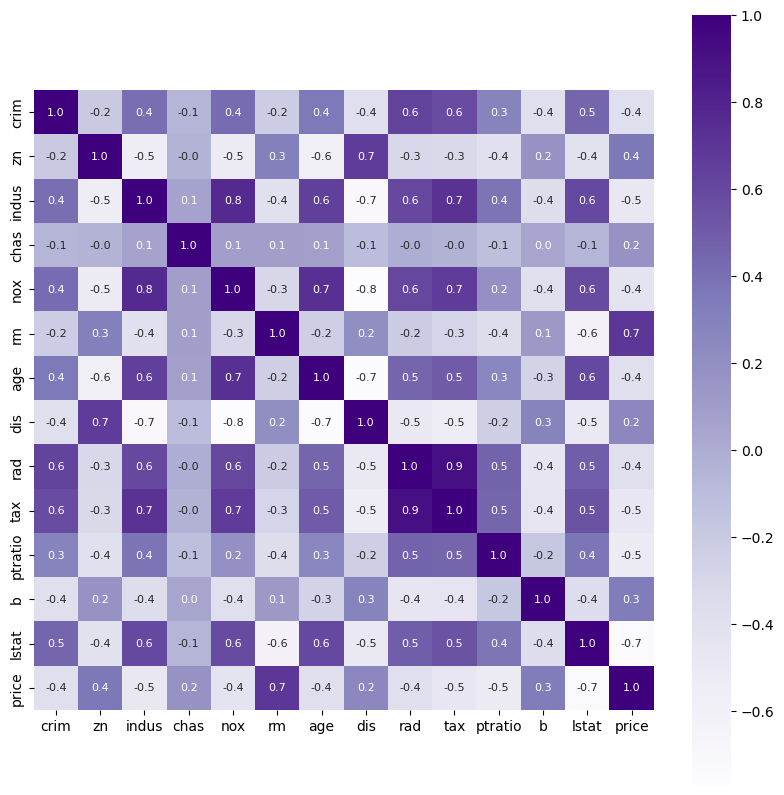

In [70]:
plt.figure(figsize = (10, 10))
sns.heatmap(correlation, cbar = True, square = True, fmt = '.1f', annot = True, annot_kws = {'size': 8}, cmap = 'Purples')

## Splitting the data and target

In [73]:
X = house_price_dataframe.drop(['price'], axis = 1)
Y = house_price_dataframe['price']

In [75]:
print(X)

        crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  
0       15.3  396.90   4.98  
1       17.8  396.90   9.14  
2       17.8  392.83   4.03  
3  

In [77]:
print(Y)

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: price, Length: 506, dtype: float64


# ***`Train-Test-Split`***

In [81]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [85]:
print(X.shape, X_train.shape, X_test.shape)

(506, 13) (404, 13) (102, 13)


# ***`Model Training`***

# XGBoost Regressor

In [89]:
# Loading the model
model = XGBRegressor()

In [93]:
# Training the model with X_train
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

# ***`Model Evaluation`***

### Prediction on Training data

In [97]:
# Accuracy for prediction on training data
training_data_prediction = model.predict(X_train)

In [99]:
print(training_data_prediction)

[23.112196  20.992601  20.10438   34.67932   13.920501  13.499354
 21.998383  15.206723  10.89543   22.67402   13.795236   5.602332
 29.808502  49.98666   34.89634   20.594336  23.388903  19.2118
 32.69294   19.604128  26.978151   8.405952  46.00062   21.70406
 27.084402  19.372278  19.297894  24.79984   22.608278  31.707775
 18.53683    8.703393  17.40025   23.698814  13.29729   10.504759
 12.693588  24.994888  19.694864  14.911037  24.20254   24.991112
 14.901547  16.987965  15.592753  12.704759  24.505623  15.007718
 49.999355  17.509344  21.18844   31.999287  15.606071  22.902134
 19.309835  18.697083  23.302961  37.19767   30.102247  33.117855
 20.993683  50.00471   13.40048    5.002565  16.50862    8.4016905
 28.651423  19.49218   20.595366  45.404697  39.808857  33.4055
 19.81498   33.406376  25.30206   49.998615  12.544487  17.433802
 18.602612  22.601418  50.004013  23.814182  23.313164  23.097467
 41.71243   16.112017  31.604454  36.09397    7.0009975 20.406271
 19.992195  12

In [101]:
# R-Squared Error
score_1 = metrics.r2_score(Y_train, training_data_prediction)

# Mean Absolute Error
score_2 = metrics.mean_absolute_error(Y_train, training_data_prediction)

print("R-squared Error: ", score_1)
print("Mean Squared Error: ", score_2)

R-squared Error:  0.9999980039471451
Mean Squared Error:  0.0091330346494618


# ***`Visualisation`***

## Visualising the actual prices and the predicted prices

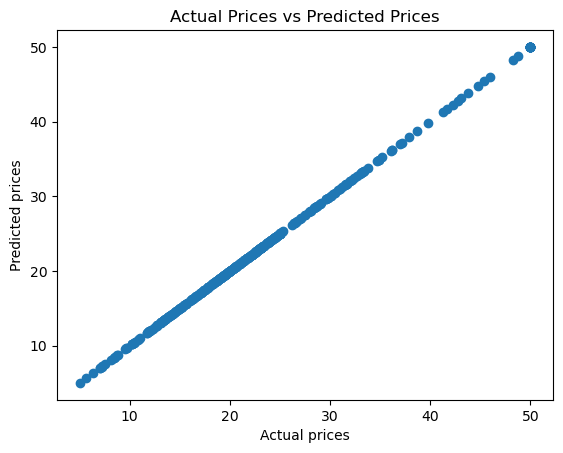

In [112]:
plt.scatter(Y_train, training_data_prediction)
plt.xlabel("Actual prices")
plt.ylabel("Predicted prices")
plt.title("Actual Prices vs Predicted Prices")
plt.show()

### Prediction on Test data

In [104]:
# Accuracy for prediction on test data
test_data_prediction = model.predict(X_test)

In [106]:
print(test_data_prediction)

[22.007828  21.22598   30.466019  27.735027   9.134951  12.740403
 25.738058  27.750889  25.364376  20.229292  27.821787  24.7761
 19.771252  20.497349  12.970438  22.86288   19.605635  10.677987
  8.277654  15.529657  22.842052  20.002996  34.06762   18.943192
 15.624948  18.787666  46.0246    33.05114   34.804283  19.070232
 17.53711   20.27066   31.102339  24.026129  12.199101  18.224184
 10.182956  21.252314  22.891352  21.458113  26.451164  12.1898775
 27.141438   8.322471  21.356699  12.768549  35.221687  14.574406
 32.06173   15.088605  31.076805  26.808199   6.1558666 34.42615
 25.135347  19.508772  19.424906  19.58183   16.680052  22.962534
 20.904106  21.24      18.46788   29.243906  33.434864  26.021257
 49.91979   25.905489   9.713634  24.058743  16.63922    9.0341625
 13.197622  18.80479   26.985659  24.746912  22.200838  21.017391
 19.30188   24.098715  34.517494  19.51518   20.331131  31.346212
 47.815742  36.102997  17.42751   24.595816  29.387545  18.68302
 19.893139  

In [108]:
# R-Squared Error
score_3 = metrics.r2_score(Y_test, test_data_prediction)

# Mean Absolute Error
score_4 = metrics.mean_absolute_error(Y_test, test_data_prediction)

print("R-squared Error: ", score_1)
print("Mean Squared Error: ", score_2)

R-squared Error:  0.9999980039471451
Mean Squared Error:  0.0091330346494618
